# Notebook Overview (LSTM):

#### In this notebook:
- Model with LSTM layer
- Current accepted model
- Minimal visualization (see other notebook for better official exploration)

This model is the model that is currently being used in the tool. Note that no dropout was used like in the GRU layer model which is certainly causing some overfitting issues. The GRU model (using a dropout) will likely be replacing this model once it is accurate enough.

## Global imports

In [1]:
#Libraries
import math
from datetime import datetime
import pandas_datareader as pdr
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Importing our data

In [2]:
#Grab stock quote
start_date = datetime(2014, 1, 1)
end_date = datetime(2022, 1, 1)
sq = pdr.DataReader('GOOG', 'stooq', start_date, end_date)

# Reindex our dataframe to be in ascending order by date.
sq = sq.reindex(index=sq.index[::-1])
sq

,Open,High,Low,Close,Volume
Date,,,,,
2014-03-27,28.4000,28.4000,27.6460,27.9230,261040
2014-03-28,28.0600,28.3215,27.9335,27.9995,820060
2014-03-31,28.3445,28.3500,27.8465,27.8485,215440
2014-04-01,27.9355,28.4225,27.9355,28.3580,158640
2014-04-02,29.9995,30.2415,28.1095,28.3500,2933940
...,...,...,...,...,...
2021-12-27,147.4640,148.4260,147.2500,148.0640,13259320
2021-12-28,148.3740,148.3740,145.9360,146.4480,18635840
2021-12-29,146.4300,147.1840,145.5040,146.5040,17024720


## Data Visualization / Exploration

In [3]:
sq.shape
sq.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1957 entries, 2014-03-27 to 2021-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1957 non-null   float64
 1   High    1957 non-null   float64
 2   Low     1957 non-null   float64
 3   Close   1957 non-null   float64
 4   Volume  1957 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 91.7 KB


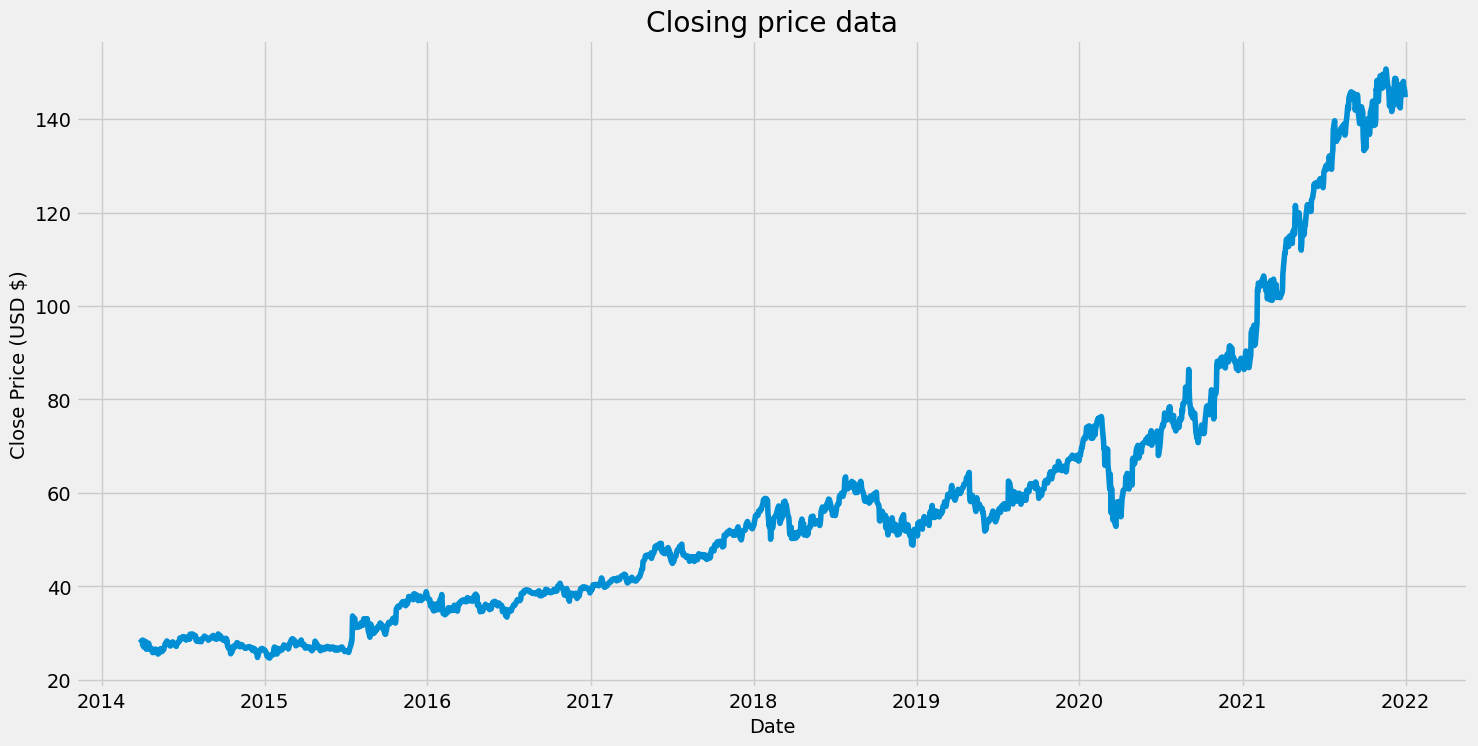

In [4]:
#Closing price data visual
plt.figure(figsize=(16,8))
plt.title('Closing price data')
plt.plot(sq['Close'])
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price (USD $)', fontsize=14)
plt.show()

<AxesSubplot: >

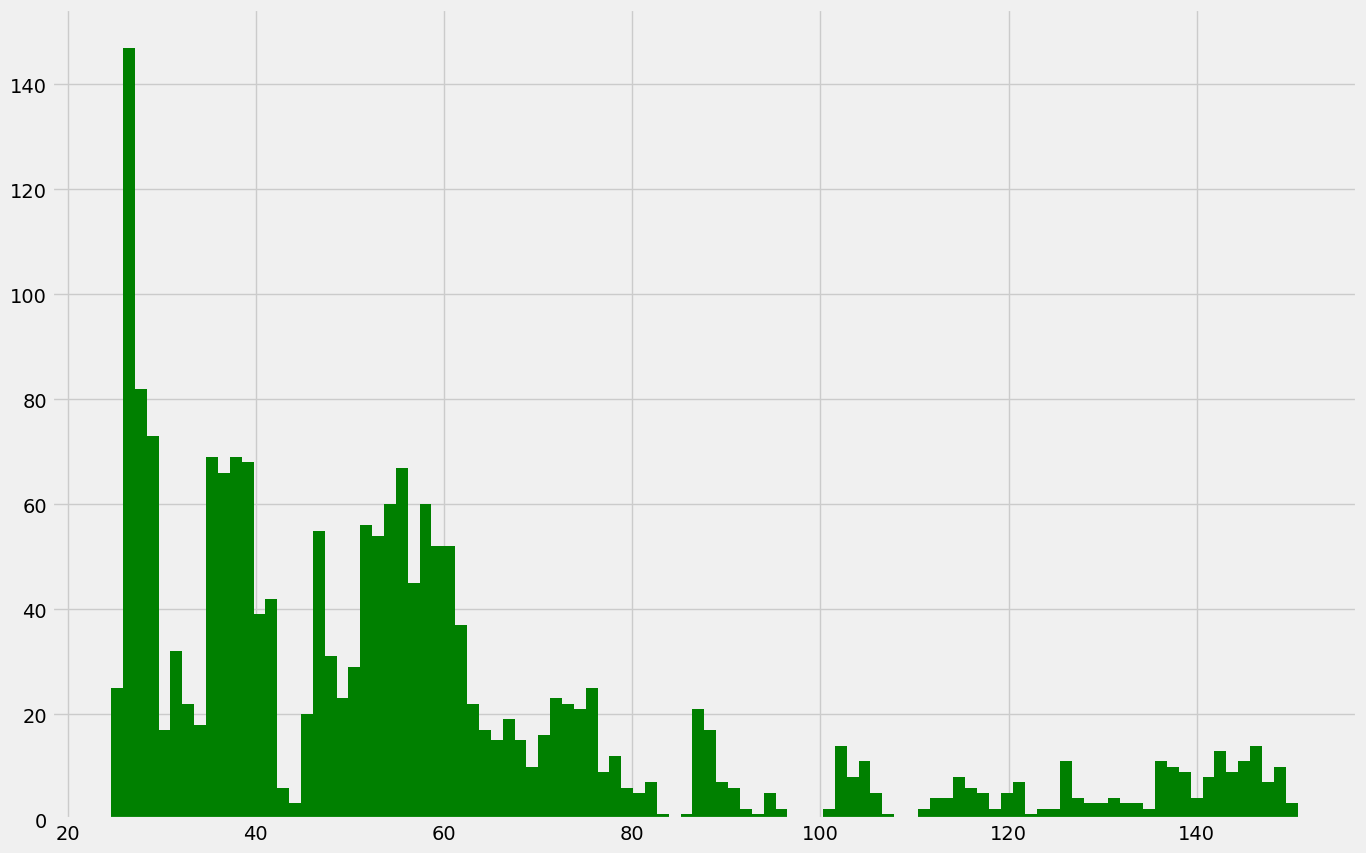

In [5]:
sq['Close'].hist(bins=100, figsize=(15,10), color="green")

## Preprocessing

In [6]:
#Create dataframe for close column
data = sq.filter(['Close'])
#Convert dataframe to numpy array
dataset = data.values
#Get num rows to train model
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

1566

In [7]:
#Scale data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02613786],
       [0.02674461],
       [0.02554697],
       ...,
       [0.96664856],
       [0.96266701],
       [0.95218172]])

## Train set

In [8]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split data into x_train and y_train sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i, 0])

  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.02613786, 0.02674461, 0.02554697, 0.029588  , 0.02952455,
       0.03061115, 0.02006242, 0.01808354, 0.02472607, 0.02839037,
       0.01919393, 0.01508945, 0.01585086, 0.01740541, 0.02537644,
       0.01727057, 0.01430424, 0.016759  , 0.013638  , 0.01293211,
       0.00937092, 0.00975559, 0.0139394 , 0.01352696, 0.01538687,
       0.01403061, 0.01398302, 0.00895849, 0.00690426, 0.0073167 ,
       0.01038217, 0.01481978, 0.0160769 , 0.013523  , 0.01087788,
       0.01113565, 0.01439942, 0.01476029, 0.01839683, 0.02082383,
       0.02385362, 0.02910816, 0.02741481, 0.0267803 , 0.02670495,
       0.0243414 , 0.02077624, 0.0206652 , 0.0243295 , 0.02529316,
       0.0275893 , 0.02696668, 0.02628855, 0.02331825, 0.02348084,
       0.02051451, 0.02001087, 0.02411932, 0.02472607, 0.02530506])]
[0.02871158734627996]

[array([0.02613786, 0.02674461, 0.02554697, 0.029588  , 0.02952455,
       0.03061115, 0.02006242, 0.01808354, 0.02472607, 0.02839037,
       0.01919393, 0.01508945, 0.01

In [9]:
#Convert the x_train and y_train to numpy arrays

x_train, y_train = np.array(x_train), np.array(y_train)
x_train

array([[0.02613786, 0.02674461, 0.02554697, ..., 0.02411932, 0.02472607,
        0.02530506],
       [0.02674461, 0.02554697, 0.029588  , ..., 0.02472607, 0.02530506,
        0.02871159],
       [0.02554697, 0.029588  , 0.02952455, ..., 0.02530506, 0.02871159,
        0.02858072],
       ...,
       [0.24874783, 0.23962675, 0.24695931, ..., 0.37835051, 0.38213774,
        0.3859805 ],
       [0.23962675, 0.24695931, 0.22991874, ..., 0.38213774, 0.3859805 ,
        0.36138926],
       [0.24695931, 0.22991874, 0.22369261, ..., 0.3859805 , 0.36138926,
        0.36509321]])

In [10]:
#Reshape data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1506, 60, 1)

# Model

In [11]:
#Building Model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
#Compile the model

model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
#T rain model
# Speed is compromised with small batch size, but only 3 epochs makes this acceptable.
model.fit(x_train, y_train, batch_size=4, epochs=3)

Epoch 1/3
377/377 [==============================] - 10s 20ms/step - loss: 9.0904e-04
Epoch 2/3
377/377 [==============================] - 8s 20ms/step - loss: 2.0190e-04
Epoch 3/3
377/377 [==============================] - 7s 19ms/step - loss: 1.8047e-04


# Test set

In [14]:
#Create the testing data set
test_data = scaled_data[training_data_len -60:, :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [15]:
#Convert to numpy/reshape
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [16]:
#Get models predicted price vals
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

13/13 [==============================] - 1s 8ms/step


In [17]:
#Get RSME
rmse = np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

# Note this isn't tradtional rmse for regression where we would see values in range 0-2, 
# in this case RMSE close to 0 is desired and our result of ~3 is actually not terrible
# because this value isn't scaled and stock prices are roughly ~125

2.996384333691647

# Result Visual

C:\Users\layf1\AppData\Local\Temp\ipykernel_25120\4205966873.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


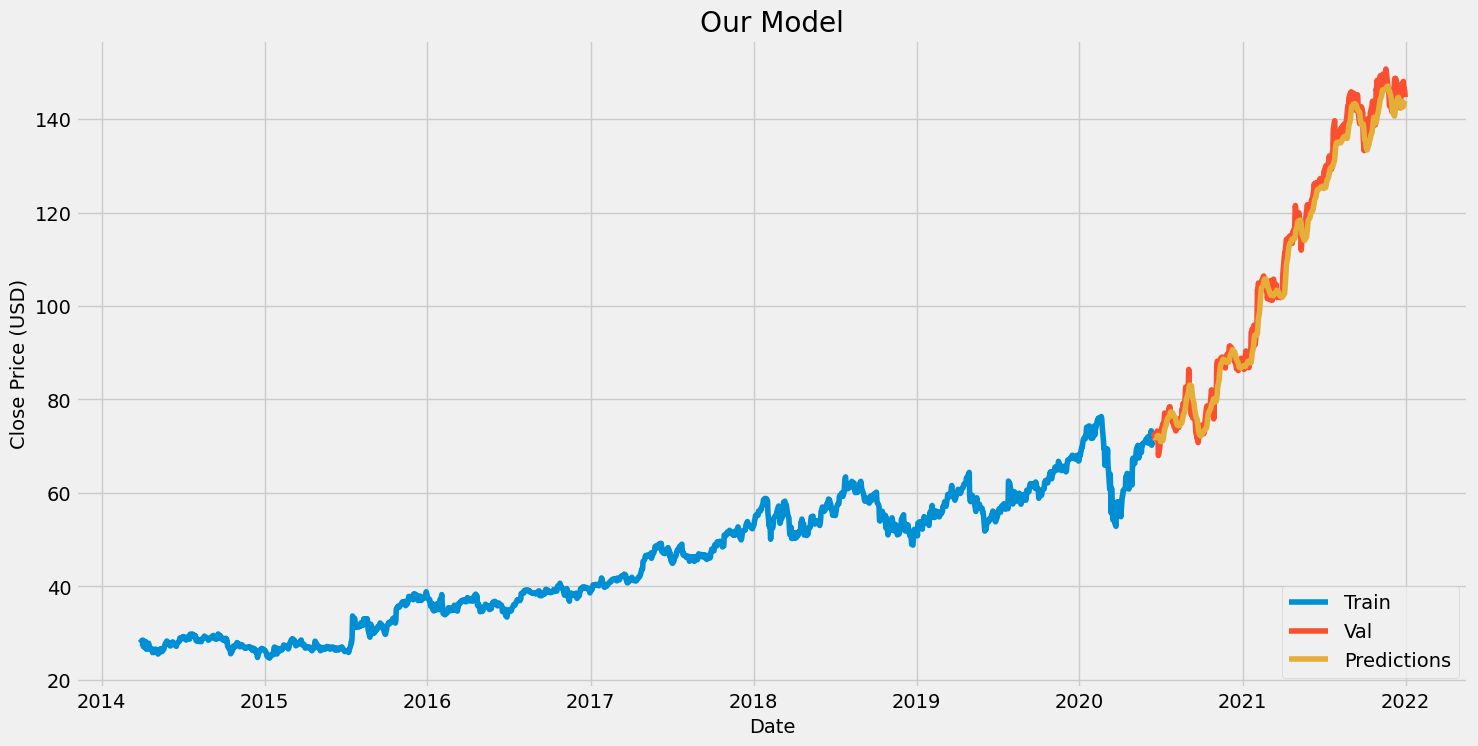

In [18]:
#Plotting
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Data visual
plt.figure(figsize=(16,8))
plt.title('Our Model')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price (USD)', fontsize=14)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()


In [19]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-06-16,72.136,71.815781
2020-06-17,72.556,71.751984
2020-06-18,71.798,71.818230
2020-06-19,71.586,71.862259
2020-06-22,72.593,71.868820
...,...,...
2021-12-27,148.064,142.699921
2021-12-28,146.448,143.222382
2021-12-29,146.504,143.589188


## Single prediction

In [20]:
#Quote/DF
goog_quote = pdr.DataReader('GOOG', data_source='stooq', start='2014-01-01', end='2023-05-01')
goog_quote = goog_quote.reindex(index=goog_quote.index[::-1])
new_df = goog_quote.filter(['Close'])
last_60_days = new_df[-60:].values
#Scale data (0-1)
last_60_days_scaled = scaler.transform(last_60_days)

#List of scaled data + reshape
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Undo scaling
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 17ms/step
[[106.05805]]


In [21]:
#Quote on specific day
goog_quote_day = pdr.DataReader('GOOG', data_source='stooq', start='2014-01-01', end='2023-05-01')
print(goog_quote_day['Close'])

Date
2023-05-01    107.7100
2023-04-28    108.2200
2023-04-27    108.3700
2023-04-26    104.4500
2023-04-25    104.6100
                ...   
2014-04-02     28.3500
2014-04-01     28.3580
2014-03-31     27.8485
2014-03-28     27.9995
2014-03-27     27.9230
Name: Close, Length: 2290, dtype: float64
